In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as p
import numpy as np

In [2]:
dataframe = p.read_csv("salary_exp.csv")
dataframe

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
dataframe.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


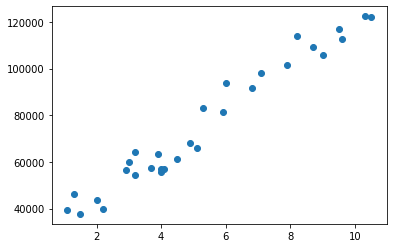

In [4]:
plt.scatter(dataframe["YearsExperience"],dataframe["Salary"])

In [5]:
x= dataframe["YearsExperience"]
y= dataframe["Salary"]
x= x.values.reshape(-1,1)
y= y.values.reshape(-1,1)

In [6]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
lr.coef_

array([[9449.96232146]])

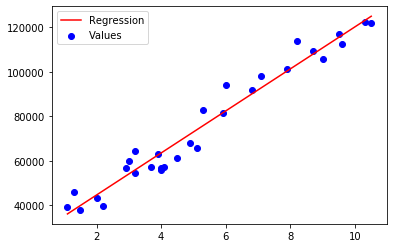

In [8]:
plt.scatter(x,y,color="blue",label="Values")
plt.plot(x,lr.predict(x),color="red",label="Regression")
plt.legend(loc="best")

In [9]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y, test_size=0.2 , random_state=9)

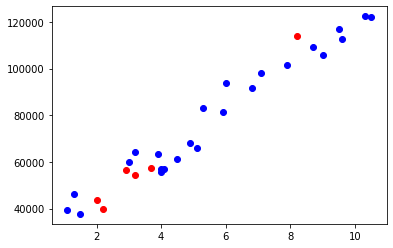

In [10]:
lr1=LinearRegression()
lr1.fit(Xtrain,Ytrain)
plt.scatter(Xtrain,Ytrain,color="blue",label="Values")
plt.scatter(Xtest,Ytest,color="red",label="Values")

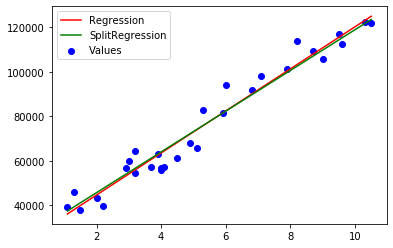

In [11]:
plt.scatter(x,y,color="blue",label="Values")
plt.plot(x,lr.predict(x),color="red",label="Regression")
plt.plot(x,lr1.predict(x),color="green",label="SplitRegression")
plt.legend(loc="best")

In [12]:
mean_squared_error(Ytrain,lr.predict(Xtrain)),mean_squared_error(Ytest,lr.predict(Xtest))

(31416452.1598077, 30688949.97217402)

In [13]:
sc_x= StandardScaler()
sc_y= StandardScaler()

In [14]:
Xtrain=sc_x.fit_transform(Xtrain)

In [15]:
Ytrain=sc_y.fit_transform(Ytrain)

In [16]:
Xtest=sc_x.transform(Xtest)

In [17]:
Ytest=sc_y.transform(Ytest)

In [18]:
lr3=LinearRegression()

In [19]:
lr3.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

array([[0.97735518]])

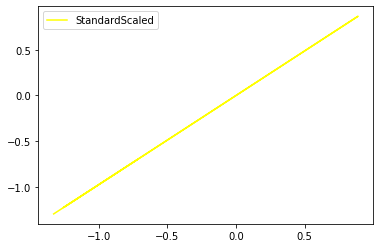

In [20]:
plt.plot(Xtest,lr3.predict(Xtest),color="yellow",label="StandardScaled")
plt.legend(loc="best")
lr3.coef_

In [21]:
mean_squared_error(Ytrain,lr3.predict(Xtrain)),mean_squared_error(Ytest,lr3.predict(Xtest))

(0.04477684842975969, 0.05371176871230309)

2.9374650859873935e-16 1.0
-1.5728159515523052e-16 1.0


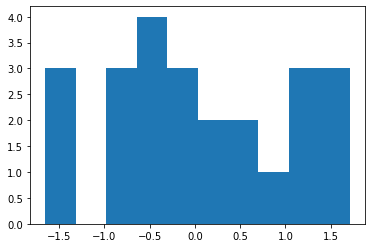

In [22]:
plt.hist(Xtrain)
print(np.mean(Xtrain),np.std(Xtrain))
print(np.mean(Ytrain),np.std(Ytrain))

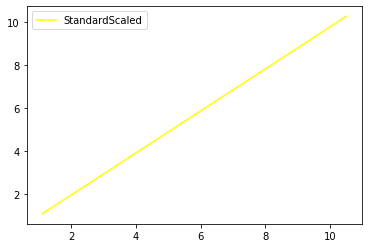

In [23]:
Ytest=sc_y.inverse_transform(Ytest)
Xtest=sc_x.inverse_transform(Xtest)
plt.plot(x,lr3.predict(x),color="yellow",label="StandardScaled")
plt.legend(loc="best")

In [24]:
exp = 6

sample = lr3.predict(sc_x.transform([[exp]]))
sample = sc_y.inverse_transform(sample)
sample

array([[82368.14555445]])

In [25]:
c=np.array(x)
d=np.array(y)
ct=c.transpose()

In [30]:
ans1= np.dot(c,ct)
ans1

array([[  1.21,   1.43,   1.65,   2.2 ,   2.42,   3.19,   3.3 ,   3.52,
          3.52,   4.07,   4.29,   4.4 ,   4.4 ,   4.51,   4.95,   5.39,
          5.61,   5.83,   6.49,   6.6 ,   7.48,   7.81,   8.69,   9.02,
          9.57,   9.9 ,  10.45,  10.56,  11.33,  11.55],
       [  1.43,   1.69,   1.95,   2.6 ,   2.86,   3.77,   3.9 ,   4.16,
          4.16,   4.81,   5.07,   5.2 ,   5.2 ,   5.33,   5.85,   6.37,
          6.63,   6.89,   7.67,   7.8 ,   8.84,   9.23,  10.27,  10.66,
         11.31,  11.7 ,  12.35,  12.48,  13.39,  13.65],
       [  1.65,   1.95,   2.25,   3.  ,   3.3 ,   4.35,   4.5 ,   4.8 ,
          4.8 ,   5.55,   5.85,   6.  ,   6.  ,   6.15,   6.75,   7.35,
          7.65,   7.95,   8.85,   9.  ,  10.2 ,  10.65,  11.85,  12.3 ,
         13.05,  13.5 ,  14.25,  14.4 ,  15.45,  15.75],
       [  2.2 ,   2.6 ,   3.  ,   4.  ,   4.4 ,   5.8 ,   6.  ,   6.4 ,
          6.4 ,   7.4 ,   7.8 ,   8.  ,   8.  ,   8.2 ,   9.  ,   9.8 ,
         10.2 ,  10.6 ,  11.8 ,  12. 

In [32]:
ans1=ans1**-1

In [33]:
ans2=np.dot(d,ct)

In [36]:
ans=np.dot(ans1,ans2)

In [38]:
print(ans)

[[ 498263.56474201  588856.94014964  679450.31555728  905933.75407637
   996527.12948401 1313603.94341074 1358900.63111456 1449494.0065222
  1449494.0065222  1675977.44504129 1766570.82044893 1811867.50815275
  1811867.50815275 1857164.19585657 2038350.94667184 2219537.69748712
  2310131.07289475 2400724.44830239 2672504.5745253  2717801.26222912
  3080174.76385967 3216064.82697113 3578438.32860168 3714328.39171313
  3940811.83023223 4076701.89334368 4303185.33186278 4348482.0195666
  4665558.83349333 4756152.20890097]
 [ 421607.63170477  498263.56474201  574919.49777924  766559.33037232
   843215.26340955 1111511.02903986 1149838.99555848 1226494.92859571
  1226494.92859571 1418134.76118879 1494790.69422602 1533118.66074463
  1533118.66074463 1571446.62726325 1724758.49333771 1878070.35941218
  1954726.29244941 2031382.22548664 2261350.02459833 2299677.99111695
  2606301.72326588 2721285.62282172 3027909.35497065 3142893.2545265
  3334533.08711958 3449516.98667543 3641156.81926851 367